In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
file = 'House_price_multifeatures.csv'

In [3]:
df = pd.read_csv(file)

C:\Users\dmar0\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_short = df.head(10)

In [5]:
df_short

,Unnamed: 0,Id,PropertyLocationStreet1,PropertyLocationStreet2,PropertyCity,CountyFIPS,PropertyZip,OwnerName,OwnerMailAddress1,OwnerMailAddress2,...,HydrantLatitude,HydrantLongitude,LastSalePrice,LastSaleDate,Homestead,FloodzoneLastUpdatedDate,StateParcelId,AssesmentYear,Geometry,TTTerritory
0,0,120210f35317ca697,503 LAKE LOUISE CIR,19-201,NAPLES,21.0,34110,"BOLTZ, LARRY P & SANDRA A",3739 WRENS NEST BLVD,NaN,...,NaN,NaN,NaN,NaN,False,5/12/17 0:00,C21-000-188-9852-8,2015.0,NaN,541-0
1,0,12086db272d757be6,5934 NW 7 PL,NaN,MIAMI,86.0,33127,LILIANE MORISSETTE,5934 NW 7 PL,NaN,...,25.83045,-80.21022,NaN,NaN,True,12/8/17 0:00,C23-000-198-3578-4,2015.0,NaN,032-0
2,0,12057c35a22b0865c,5713 PALM RIVER RD,NaN,TAMPA,57.0,33619,PADRON LUIS A,5713 PALM RIVER RD,NaN,...,27.94326,-82.39026,NaN,NaN,True,1/1/31 0:00,C39-000-406-3313-3,2015.0,NaN,080-0
3,0,12057cf31f8e69893,1805 MAGDALENE MANOR DR,NaN,TAMPA,57.0,33613,BELLO CELESTE M,1805 MAGDALENE MANOR DR,NaN,...,28.07439,-82.47757,NaN,NaN,True,4/4/18 0:00,C39-000-389-2623-4,2015.0,NaN,080-0
4,0,12057c5b7712cfb0b,7405 ALAFIA RIDGE LP,NaN,RIVERVIEW,57.0,33569,LANE ROY JR,7405 ALAFIA RIDGE LOOP,NaN,...,27.87574,-82.29307,NaN,NaN,True,1/1/31 0:00,C39-000-414-6909-9,2015.0,NaN,080-0
5,0,12057a9d507819528,1715 CINNABAR CT,NaN,BRANDON,57.0,33510,ALBRIGHT SANDRA,1715 CINNABAR CT,NaN,...,27.97226,-82.30971,NaN,NaN,True,4/4/18 0:00,C39-000-411-1518-9,2015.0,NaN,080-0
6,0,12057fc3fb8804556,802 FOX HILLS DR,NaN,SUN CITY CENTER,57.0,33573,RODRIGUEZ GLORIA H LIFE ESTATE,802 FOX HILLS DR,NaN,...,27.72448,-82.34824,NaN,NaN,True,5/20/18 0:00,C39-000-416-1560-0,2015.0,NaN,080-0
7,0,1205784c858ba39d6,1836 CRAVEN DR,NaN,SEFFNER,57.0,33584,AVIRETT CATHERINE A,1836 CRAVEN DR,NaN,...,27.97836,-82.27822,NaN,NaN,True,4/4/18 0:00,C39-000-411-4081-5,2015.0,NaN,080-0
8,0,120571eb9b1f70b2c,13759 JUNIPER BLOSSOM DR 101,NaN,TAMPA,57.0,33618,COOPER JOHN D,1628 HARRINGTON PARK DR,NaN,...,28.07865,-82.48839,78000.0,Mar-18,False,2/23/15 0:00,C39-000-955-1597-9,2015.0,NaN,080-0
9,0,12057e4b4e43b1b20,3907 WEST LAKE DR,NaN,SEFFNER,57.0,33584,TAH HOLDING LP,PO BOX 15087,NaN,...,27.98138,-82.29623,NaN,NaN,False,4/4/18 0:00,C39-000-411-2244-1,2015.0,NaN,080-0


In [6]:
new_df = df[['Id','OwnerCity', 'OwnerState','PropertyLocationStreet1','PropertyCity','PropertyZip','CountyName','StateParcelId','ParcelSize','ValueofHome','YearBuilt','TypeOfResidence','NumberOfStories','AdjSquareFeet',
            'Pool','PPC', 'BCEG', 'DistancetoCoast', 'PoliceID','Crime','FireID','DistancetoFireDepartment', 'DistancetoSinkhole','SinkholeLatitude',
            'SinkholeLongitude', 'LocationWindSpeed', 'WindborneDebrisRegion', 'Terrain', 'FloodZone', 'FloodZoneRiskLevel']]
new_df

,Id,OwnerCity,OwnerState,PropertyLocationStreet1,PropertyCity,PropertyZip,CountyName,StateParcelId,ParcelSize,ValueofHome,...,FireID,DistancetoFireDepartment,DistancetoSinkhole,SinkholeLatitude,SinkholeLongitude,LocationWindSpeed,WindborneDebrisRegion,Terrain,FloodZone,FloodZoneRiskLevel
0,120210f35317ca697,MAUMEE,OH,503 LAKE LOUISE CIR,NAPLES,34110,COLLIER,C21-000-188-9852-8,NaN,200840.0,...,50.0,1.20,NaN,NaN,NaN,129.0,True,B,A:100,NaN
1,12086db272d757be6,MIAMI,FL,5934 NW 7 PL,MIAMI,33127,MIAMI-DADE,C23-000-198-3578-4,4880.0,164994.0,...,626.0,0.98,9.56,25.96256,-80.16641,146.0,True,HVHZ,A:100,NaN
2,12057c35a22b0865c,TAMPA,FL,5713 PALM RIVER RD,TAMPA,33619,HILLSBOROUGH,C39-000-406-3313-3,16913.0,200346.0,...,NaN,0.05,0.82,27.94389,-82.37694,120.0,True,B,A:100,NaN
3,12057cf31f8e69893,TAMPA,FL,1805 MAGDALENE MANOR DR,TAMPA,33613,HILLSBOROUGH,C39-000-389-2623-4,27374.0,364161.0,...,NaN,1.69,0.39,28.08028,-82.47806,120.0,True,B,"A:60, X:40",NaN
4,12057c5b7712cfb0b,RIVERVIEW,FL,7405 ALAFIA RIDGE LP,RIVERVIEW,33569,HILLSBOROUGH,C39-000-414-6909-9,43883.0,138691.0,...,NaN,1.37,1.09,27.89053,-82.29201,120.0,True,B,"X:80, X500:20",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59208,120865661a78fa3c8,MIAMI,FL,9221 NW 17 AVE,MIAMI,33147,MIAMI-DADE,C23-000-240-0005-1,8250.0,114432.0,...,NaN,0.57,8.07,25.96256,-80.16641,146.0,True,HVHZ,X:100,NaN
59209,1200980de660f371c,MELBOURNE,FL,1199 HOUSTON ST,MELBOURNE,32935,BREVARD,C15-001-090-5145-8,10890.0,119690.0,...,620.0,0.52,25.42,28.46383,-80.79177,120.0,True,C,X:100,NaN
59210,1208698914968668a,CORAL GABLES,FL,3715 HARLANO ST,CORAL GABLES,33134,MIAMI-DADE,C23-000-211-7828-0,7875.0,539553.0,...,NaN,0.66,16.74,25.96256,-80.16641,146.0,True,HVHZ,X:100,NaN
59211,120117d9876b67325,HOLLYWOOD,FLORIDA,714 N 32 AVE,HOLLYWOOD,33021,BROWARD,C16-000-116-3292-4,6502.0,194190.0,...,459.0,0.49,1.97,25.99000,-80.18329,140.0,True,HVHZ,X500:100,NaN


In [7]:
new_df['OwnerState'].unique()

array(['OH', 'FL', 'CA', 'FLORIDA', 'GA', 'NJ', 'OHIO', 'AZ', 'MN',
       'TEXAS', 'TX', 'NY', 'FRANCE', 'CANADA', ' FL', 'MA', 'CALIFORNIA',
       'NC', 'MI', 'IL', 'MO', 'NEW YORK', 'NEW JERSEY', 'VIRGINIA',
       'GEORGIA', 'MD', 'MICHIGAN', 'VENEZUELA', 'PA', 'AL', 'VA',
       'UNITED KINGDOM', 'SC', 'WI', 'TN', 'CT', nan, 'IN', 'QC', ' CA',
       'KY', 'KENTUCKY', 'ARIZONA', 'CONNECTICUT', 'MARYLAND',
       'NEW HAMPSHIRE', 'PR', 'PENNSLYVANIA', 'ISRAEL', 'RI', 'CO',
       'COLORADO', 'NORTH CAROLINA', 'LA', 'OK', 'DC', 'ID', 'KS',
       'DELAWARE', 'ME', 'PARAGUAY', 'OREGON', 'ILLINOIS', 'PENNSYLVANIA',
       'VI', 'GUATEMALA', 'GREAT BRITAIN', 'DISTRICT OF COLUMBIA',
       'MINNESOTA', 'MEXICO', 'MASSACHUSETTS', 'NH', 'GERMANY',
       'SINGAPORE', 'INDIANA', 'DE', 'UTAH', 'RHODE ISLAND', 'ALASKA',
       'NEVADA', 'TENNESSEE', 'ITALY', 'NE', 'GBR', 'HI', 'ON', 'NORWAY',
       'IA', 'WV', 'UT', 'SPAIN', 'VIRGIN ISLANDS', 'PUERTO RICO', 'UK',
       'OKLAHOMA', 'WISCON

In [8]:
new_df['OwnerState'] = new_df['OwnerState'].replace(
    {'NORTH CAROLINA': 'NC', 'VIRGINIA': 'VA', 'SOUTH CAROLINA': 'SC'})

C:\Users\dmar0\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
new_df['OwnerState'].unique()

array(['OH', 'FL', 'CA', 'FLORIDA', 'GA', 'NJ', 'OHIO', 'AZ', 'MN',
       'TEXAS', 'TX', 'NY', 'FRANCE', 'CANADA', ' FL', 'MA', 'CALIFORNIA',
       'NC', 'MI', 'IL', 'MO', 'NEW YORK', 'NEW JERSEY', 'VA', 'GEORGIA',
       'MD', 'MICHIGAN', 'VENEZUELA', 'PA', 'AL', 'UNITED KINGDOM', 'SC',
       'WI', 'TN', 'CT', nan, 'IN', 'QC', ' CA', 'KY', 'KENTUCKY',
       'ARIZONA', 'CONNECTICUT', 'MARYLAND', 'NEW HAMPSHIRE', 'PR',
       'PENNSLYVANIA', 'ISRAEL', 'RI', 'CO', 'COLORADO', 'LA', 'OK', 'DC',
       'ID', 'KS', 'DELAWARE', 'ME', 'PARAGUAY', 'OREGON', 'ILLINOIS',
       'PENNSYLVANIA', 'VI', 'GUATEMALA', 'GREAT BRITAIN',
       'DISTRICT OF COLUMBIA', 'MINNESOTA', 'MEXICO', 'MASSACHUSETTS',
       'NH', 'GERMANY', 'SINGAPORE', 'INDIANA', 'DE', 'UTAH',
       'RHODE ISLAND', 'ALASKA', 'NEVADA', 'TENNESSEE', 'ITALY', 'NE',
       'GBR', 'HI', 'ON', 'NORWAY', 'IA', 'WV', 'UT', 'SPAIN',
       'VIRGIN ISLANDS', 'PUERTO RICO', 'UK', 'OKLAHOMA', 'WISCONSIN',
       'BELGIUM', 'PHILIPPINES'

In [10]:
clean_df = new_df.loc[(new_df['OwnerState'] == 'NC') | (new_df['OwnerState'] == 'SC') | (new_df['OwnerState'] == 'VA')]
clean_df

,Id,OwnerCity,OwnerState,PropertyLocationStreet1,PropertyCity,PropertyZip,CountyName,StateParcelId,ParcelSize,ValueofHome,...,FireID,DistancetoFireDepartment,DistancetoSinkhole,SinkholeLatitude,SinkholeLongitude,LocationWindSpeed,WindborneDebrisRegion,Terrain,FloodZone,FloodZoneRiskLevel
430,12009f31026acc440,PINEHURST,NC,5833 NEWBURY CIR,MELBOURNE,32940,BREVARD,C15-000-035-4368-3,10890.0,360350.0,...,NaN,1.67,19.32,28.46383,-80.79177,120.0,True,B,X:100,NaN
603,120112bfc77a87376,STAFFORD,VA,12723 SW 49 CT,MIRAMAR,33027,BROWARD,C16-000-107-5040-4,2328.0,228680.0,...,645.0,2.37,5.11,25.98582,-80.23586,140.0,True,HVHZ,X:100,NaN
1733,12081776a04b281f4,RICHMOND,VA,6470 SEAGULL DR UNIT 307,BRADENTON,34210,MANATEE,C51-000-535-8660-8,44.0,135000.0,...,NaN,0.96,1.93,27.41706,-82.56742,130.0,True,C,A:100,NaN
1740,12103fabafeea9fb7,ARLINGTON,VA,1012 NORTH SHORE DR NE # 12,SAINT PETERSBURG,33701,PINELLAS,C62-000-778-7949-2,NaN,87660.0,...,855.0,1.08,1.00,27.77333,-82.64000,123.0,True,C,"X500:40, A:30, X:30",NaN
1753,120213b0f5f17e3d1,ROCK HILL,SC,5550 HERON POINT DR,NAPLES,34108,COLLIER,C21-000-189-4508-9,NaN,663090.0,...,50.0,1.37,11.43,26.27444,-81.63916,131.0,True,C,A:100,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57817,12086e1ddd12521cd,BLUFFTON,SC,5765 NW 99 CT,DORAL,33178,MIAMI-DADE,C23-000-278-7237-3,3473.0,329160.0,...,NaN,0.27,13.46,25.98582,-80.23586,146.0,True,HVHZ,X:100,NaN
57920,120861813f1294d56,RICHMOND,VA,7805 NOREMAC AVE,MIAMI BEACH,33141,MIAMI-DADE,C23-000-207-1780-7,9000.0,924061.0,...,627.0,0.71,7.25,25.96256,-80.16641,146.0,True,HVHZ,A:100,NaN
58911,12089ed366ee68b8e,MARS HILL,NC,246 S FLETCHER AVE,FERNANDINA BEACH,32034,NASSAU,C55-000-585-3872-9,6650.0,274291.0,...,359.0,1.23,6.33,30.67020,-81.53824,120.0,True,C,X:100,NaN
59121,1211544028709F1DD,OAKTON,VA,171 VISTA HERMOSA CIR 21-B,SARASOTA,34242,SARASOTA,C68-000-867-0448-3,NaN,267400.0,...,NaN,1.13,2.29,27.27514,-82.55399,130.0,True,B,A:100,NaN


In [11]:
clean_df.drop_duplicates(subset=['Id'])

,Id,OwnerCity,OwnerState,PropertyLocationStreet1,PropertyCity,PropertyZip,CountyName,StateParcelId,ParcelSize,ValueofHome,...,FireID,DistancetoFireDepartment,DistancetoSinkhole,SinkholeLatitude,SinkholeLongitude,LocationWindSpeed,WindborneDebrisRegion,Terrain,FloodZone,FloodZoneRiskLevel
430,12009f31026acc440,PINEHURST,NC,5833 NEWBURY CIR,MELBOURNE,32940,BREVARD,C15-000-035-4368-3,10890.0,360350.0,...,NaN,1.67,19.32,28.46383,-80.79177,120.0,True,B,X:100,NaN
603,120112bfc77a87376,STAFFORD,VA,12723 SW 49 CT,MIRAMAR,33027,BROWARD,C16-000-107-5040-4,2328.0,228680.0,...,645.0,2.37,5.11,25.98582,-80.23586,140.0,True,HVHZ,X:100,NaN
1733,12081776a04b281f4,RICHMOND,VA,6470 SEAGULL DR UNIT 307,BRADENTON,34210,MANATEE,C51-000-535-8660-8,44.0,135000.0,...,NaN,0.96,1.93,27.41706,-82.56742,130.0,True,C,A:100,NaN
1740,12103fabafeea9fb7,ARLINGTON,VA,1012 NORTH SHORE DR NE # 12,SAINT PETERSBURG,33701,PINELLAS,C62-000-778-7949-2,NaN,87660.0,...,855.0,1.08,1.00,27.77333,-82.64000,123.0,True,C,"X500:40, A:30, X:30",NaN
1753,120213b0f5f17e3d1,ROCK HILL,SC,5550 HERON POINT DR,NAPLES,34108,COLLIER,C21-000-189-4508-9,NaN,663090.0,...,50.0,1.37,11.43,26.27444,-81.63916,131.0,True,C,A:100,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57817,12086e1ddd12521cd,BLUFFTON,SC,5765 NW 99 CT,DORAL,33178,MIAMI-DADE,C23-000-278-7237-3,3473.0,329160.0,...,NaN,0.27,13.46,25.98582,-80.23586,146.0,True,HVHZ,X:100,NaN
57920,120861813f1294d56,RICHMOND,VA,7805 NOREMAC AVE,MIAMI BEACH,33141,MIAMI-DADE,C23-000-207-1780-7,9000.0,924061.0,...,627.0,0.71,7.25,25.96256,-80.16641,146.0,True,HVHZ,A:100,NaN
58911,12089ed366ee68b8e,MARS HILL,NC,246 S FLETCHER AVE,FERNANDINA BEACH,32034,NASSAU,C55-000-585-3872-9,6650.0,274291.0,...,359.0,1.23,6.33,30.67020,-81.53824,120.0,True,C,X:100,NaN
59121,1211544028709F1DD,OAKTON,VA,171 VISTA HERMOSA CIR 21-B,SARASOTA,34242,SARASOTA,C68-000-867-0448-3,NaN,267400.0,...,NaN,1.13,2.29,27.27514,-82.55399,130.0,True,B,A:100,NaN


In [12]:
clean_df.to_csv('clean1.csv', index = False, header = True)

In [13]:
#Import File

FL_Demos_file = 'FL Demos by age race gender county.csv'
Demos_df = pd.read_csv(FL_Demos_file)
Demos_df

,County,Race,Gender,Hispanic origin,0-4,5-9,10-14,15-19,15-17,18-19,...,55-59,60-64,65-69,70-74,75-79,80-84,85 and up,All Ages,Average_Age_of_County,Unnamed: 26
0,Alachua,White,Male,Nonhispanic,"3,415","3,634","3,968","7,138","2,484","4,654",...,"3,380","2,381","2,046","1,861","1,514","1,017",577,"75,825",35.414535,NaN
1,Alachua,White,Male,Hispanic,274,292,319,799,201,598,...,82,74,76,57,46,21,13,"5,699",35.414535,NaN
2,Alachua,White,Male,Both,"3,689","3,926","4,287","7,937","2,685","5,252",...,"3,462","2,455","2,122","1,918","1,560","1,038",590,"81,524",35.414535,NaN
3,Alachua,White,Female,Nonhispanic,"3,212","3,360","3,798","7,820","2,366","5,454",...,"3,553","2,696","2,337","2,421","2,240","1,560","1,458","78,258",35.414535,NaN
4,Alachua,White,Female,Hispanic,308,285,316,935,216,719,...,106,124,89,71,45,36,36,"5,842",35.414535,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3059,"County Population by Age, Race, Hispanic origi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#New df with certain columns

new_demos_df = Demos_df[['County','Race', 'Gender','Hispanic origin','0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44',
            '45-49','50-54', '55-59', '60-64', '65-69','70-74','75-79','80-84','85 and up',
            'All Ages','Average_Age_of_County']]
new_demos_df

,County,Race,Gender,Hispanic origin,0-4,5-9,10-14,15-19,20-24,25-29,...,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85 and up,All Ages,Average_Age_of_County
0,Alachua,White,Male,Nonhispanic,"3,415","3,634","3,968","7,138","13,125","6,730",...,"4,909","3,380","2,381","2,046","1,861","1,514","1,017",577,"75,825",35.414535
1,Alachua,White,Male,Hispanic,274,292,319,799,"1,648",656,...,162,82,74,76,57,46,21,13,"5,699",35.414535
2,Alachua,White,Male,Both,"3,689","3,926","4,287","7,937","14,773","7,386",...,"5,071","3,462","2,455","2,122","1,918","1,560","1,038",590,"81,524",35.414535
3,Alachua,White,Female,Nonhispanic,"3,212","3,360","3,798","7,820","12,919","5,509",...,"4,847","3,553","2,696","2,337","2,421","2,240","1,560","1,458","78,258",35.414535
4,Alachua,White,Female,Hispanic,308,285,316,935,"1,513",518,...,170,106,124,89,71,45,36,36,"5,842",35.414535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3059,"County Population by Age, Race, Hispanic origi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#New df with rows that have data

clean_demos=new_demos_df.head(2412)
clean_demos['County']=clean_demos['County'].str.upper()
clean_demos.head(2412)

C:\Users\dmar0\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,County,Race,Gender,Hispanic origin,0-4,5-9,10-14,15-19,20-24,25-29,...,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85 and up,All Ages,Average_Age_of_County
0,ALACHUA,White,Male,Nonhispanic,"3,415","3,634","3,968","7,138","13,125","6,730",...,"4,909","3,380","2,381","2,046","1,861","1,514","1,017",577,"75,825",35.414535
1,ALACHUA,White,Male,Hispanic,274,292,319,799,"1,648",656,...,162,82,74,76,57,46,21,13,"5,699",35.414535
2,ALACHUA,White,Male,Both,"3,689","3,926","4,287","7,937","14,773","7,386",...,"5,071","3,462","2,455","2,122","1,918","1,560","1,038",590,"81,524",35.414535
3,ALACHUA,White,Female,Nonhispanic,"3,212","3,360","3,798","7,820","12,919","5,509",...,"4,847","3,553","2,696","2,337","2,421","2,240","1,560","1,458","78,258",35.414535
4,ALACHUA,White,Female,Hispanic,308,285,316,935,"1,513",518,...,170,106,124,89,71,45,36,36,"5,842",35.414535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407,WASHINGTON,All Races,Female,Hispanic,19,17,14,18,13,8,...,5,2,4,4,6,3,1,1,169,40.658895
2408,WASHINGTON,All Races,Female,Both,608,675,643,674,514,551,...,685,689,533,495,428,361,280,282,"10,190",40.658895
2409,WASHINGTON,All Races,Both Sexes,Nonhispanic,"1,230","1,300","1,348","1,360","1,098","1,218",...,"1,403","1,277","1,062",960,780,635,464,421,"20,490",40.658895
2410,WASHINGTON,All Races,Both Sexes,Hispanic,37,39,33,40,37,43,...,25,7,11,10,9,10,3,1,483,40.658895


In [16]:
#New df with adjusted column headers
clean_demos_df = clean_demos.rename(columns={'Hispanic origin': 'Hispanic_origin','County': 'CountyName'})
clean_demos_df

,CountyName,Race,Gender,Hispanic_origin,0-4,5-9,10-14,15-19,20-24,25-29,...,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85 and up,All Ages,Average_Age_of_County
0,ALACHUA,White,Male,Nonhispanic,"3,415","3,634","3,968","7,138","13,125","6,730",...,"4,909","3,380","2,381","2,046","1,861","1,514","1,017",577,"75,825",35.414535
1,ALACHUA,White,Male,Hispanic,274,292,319,799,"1,648",656,...,162,82,74,76,57,46,21,13,"5,699",35.414535
2,ALACHUA,White,Male,Both,"3,689","3,926","4,287","7,937","14,773","7,386",...,"5,071","3,462","2,455","2,122","1,918","1,560","1,038",590,"81,524",35.414535
3,ALACHUA,White,Female,Nonhispanic,"3,212","3,360","3,798","7,820","12,919","5,509",...,"4,847","3,553","2,696","2,337","2,421","2,240","1,560","1,458","78,258",35.414535
4,ALACHUA,White,Female,Hispanic,308,285,316,935,"1,513",518,...,170,106,124,89,71,45,36,36,"5,842",35.414535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2407,WASHINGTON,All Races,Female,Hispanic,19,17,14,18,13,8,...,5,2,4,4,6,3,1,1,169,40.658895
2408,WASHINGTON,All Races,Female,Both,608,675,643,674,514,551,...,685,689,533,495,428,361,280,282,"10,190",40.658895
2409,WASHINGTON,All Races,Both Sexes,Nonhispanic,"1,230","1,300","1,348","1,360","1,098","1,218",...,"1,403","1,277","1,062",960,780,635,464,421,"20,490",40.658895
2410,WASHINGTON,All Races,Both Sexes,Hispanic,37,39,33,40,37,43,...,25,7,11,10,9,10,3,1,483,40.658895


In [17]:
#New df filtered down to total data

all_races_df=clean_demos_df[clean_demos_df.Race == 'All Races']
both_sexes_df=all_races_df[all_races_df.Gender == 'Both Sexes']
Both_origin_df=both_sexes_df[both_sexes_df.Hispanic_origin == 'Both']
Both_origin_df

,CountyName,Race,Gender,Hispanic_origin,0-4,5-9,10-14,15-19,20-24,25-29,...,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85 and up,All Ages,Average_Age_of_County
35,ALACHUA,All Races,Both Sexes,Both,"11,161","12,089","12,937","22,354","36,011","17,651",...,"12,384","8,749","6,645","5,646","5,223","4,490","3,059","2,500","217,955",35.414535
71,BAKER,All Races,Both Sexes,Both,"1,561","1,615","1,834","1,824","1,490","1,511",...,"1,428","1,080",899,721,567,343,236,183,"22,259",36.039535
107,BAY,All Races,Both Sexes,Both,"8,979","10,103","10,331","10,117","8,955","9,661",...,"9,738","7,895","6,919","6,188","5,554","4,044","2,280","1,751","148,217",39.072974
143,BRADFORD,All Races,Both Sexes,Both,"1,444","1,540","1,664","1,767","1,788","1,886",...,"1,678","1,372","1,152",986,845,727,437,381,"26,088",39.313592
179,BREVARD,All Races,Both Sexes,Both,"24,707","29,546","31,999","29,172","21,502","22,727",...,"29,913","26,842","25,471","26,887","25,059","21,000","12,775","8,960","476,230",42.866000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,UNION,All Races,Both Sexes,Both,737,757,875,914,823,"1,107",...,853,590,423,365,273,177,110,78,"13,442",36.828299
2303,VOLUSIA,All Races,Both Sexes,Both,"21,657","25,068","27,076","27,602","24,727","22,757",...,"28,738","24,566","23,624","24,721","25,296","22,076","14,401","11,317","443,343",43.948408
2339,WAKULLA,All Races,Both Sexes,Both,"1,352","1,561","1,851","1,708","1,137","1,380",...,"1,598","1,235","1,010",787,679,434,242,208,"22,863",37.863360
2375,WALTON,All Races,Both Sexes,Both,"2,158","2,520","2,560","2,464","1,992","2,428",...,"2,866","2,603","2,397","2,089","1,798","1,285",696,563,"40,601",41.585478


In [18]:
#Save clean file

Both_origin_df.to_csv('clean FL Demos.csv', index = False, header = True)

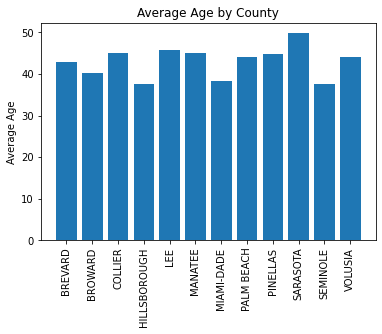

In [19]:
# Generate a bar plot showing average age by county

top_counties = ['BROWARD','PINELLAS','VOLUSIA','PALM BEACH','BREVARD','MIAMI-DADE','BREVARD','COLLIER','MANATEE','LEE','SEMINOLE','HILLSBOROUGH','SARASOTA']
plot_data_mat = Both_origin_df[Both_origin_df.CountyName.isin(top_counties)]
plot_data_mat
County = plot_data_mat['CountyName']
Avg_Age = plot_data_mat['Average_Age_of_County']
plt.xticks(rotation='vertical')
plt.title("Average Age by County")
plt.ylabel("Average Age")
plt.bar(County, Avg_Age)
plt.savefig("Average Age by County")

In [20]:
#Importing and merging 2 clean files

clean_master = pd.read_csv('clean1.csv')
clean_demos = pd.read_csv('clean FL Demos.csv')
merged = clean_master.merge(clean_demos, on='CountyName')
merged.to_csv('merged_files.csv', index = False, header = True)
merged

,Id,OwnerCity,OwnerState,PropertyLocationStreet1,PropertyCity,PropertyZip,CountyName,StateParcelId,ParcelSize,ValueofHome,...,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85 and up,All Ages,Average_Age_of_County
0,12009f31026acc440,PINEHURST,NC,5833 NEWBURY CIR,MELBOURNE,32940,BREVARD,C15-000-035-4368-3,10890.0,360350.0,...,"29,913","26,842","25,471","26,887","25,059","21,000","12,775","8,960","476,230",42.866000
1,12009f4575a7b9603,CHRISTIANSBURG,VA,297 HIGHWAY A1A,SATELLITE BEACH,32937,BREVARD,C15-000-035-9268-0,3485.0,277190.0,...,"29,913","26,842","25,471","26,887","25,059","21,000","12,775","8,960","476,230",42.866000
2,120093f03310c517b,WILMINGTON,NC,6979 MCGRADY DR,MELBOURNE,32940,BREVARD,C15-000-052-6688-7,6098.0,219010.0,...,"29,913","26,842","25,471","26,887","25,059","21,000","12,775","8,960","476,230",42.866000
3,12009af41562b6437,NEWBERRY,SC,235 STEWART DR,MERRITT ISLAND,32952,BREVARD,C15-001-088-4839-1,49223.0,798030.0,...,"29,913","26,842","25,471","26,887","25,059","21,000","12,775","8,960","476,230",42.866000
4,12009136849a01642,FORT MILL,SC,4983 PATRICIA ST,COCOA,32927,BREVARD,C15-000-026-2227-2,10019.0,141290.0,...,"29,913","26,842","25,471","26,887","25,059","21,000","12,775","8,960","476,230",42.866000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,12087bdaf6c291e5c,VIENNA,VA,1069 OCEAN DR,SUMMERLAND KEY,33042,MONROE,C54-000-584-7574-0,20340.0,781237.0,...,"7,149","5,596","4,341","3,576","3,203","2,417","1,476",976,"79,589",43.138775
218,12087005fb19c056a,RALEIGH,NC,1631 SUNRISE DR,BIG PINE KEY,33043,MONROE,C54-000-579-9870-0,14475.0,438018.0,...,"7,149","5,596","4,341","3,576","3,203","2,417","1,476",976,"79,589",43.138775
219,120871d8216caac91,FAIR BLUFF,NC,27411 MARTINIQUE LN,RAMROD KEY,33042,MONROE,C54-000-584-0053-2,6000.0,340597.0,...,"7,149","5,596","4,341","3,576","3,203","2,417","1,476",976,"79,589",43.138775
220,12087d30783015ada,HAW RIVER,NC,1136 HAKLUYT LN,CUDJOE KEY,33042,MONROE,C54-000-584-2708-9,9051.0,842684.0,...,"7,149","5,596","4,341","3,576","3,203","2,417","1,476",976,"79,589",43.138775


The correlation between average age of county and value of home is 0.09191731685497984
Linear regression equation is y = 2e-06x + 42.633948


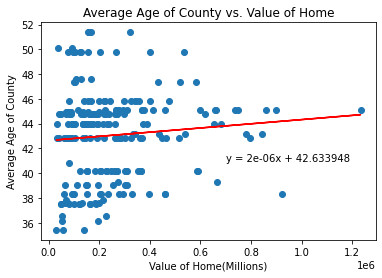

In [21]:
#Creating data analysis and scatter plot

AAC=merged['Average_Age_of_County']
VH=merged['ValueofHome']
correlation = st.pearsonr(AAC,VH)
print(f'The correlation between average age of county and value of home is {correlation[0]}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(VH,AAC)
line_eq = "y = " + str(round(slope,6)) + "x + " + str(round(intercept,6))
print(f'Linear regression equation is {line_eq}')

ValueofHome=merged.ValueofHome
Average_Age=merged.Average_Age_of_County
plt.scatter(ValueofHome, Average_Age)
plt.title('Average Age of County vs. Value of Home')
plt.ylabel('Average Age of County')
plt.xlabel('Value of Home(Millions)')
reg_values = VH * slope + intercept
plt.plot(VH, reg_values, "r-")
plt.annotate(line_eq,(700000,41))
plt.savefig("Average Age vs Value of Home Scatter")
plt.show()

In [22]:
#Using file from above to create location analysis and removing bad data

merged_clean_DTC=merged[merged.DistancetoCoast != -99]
merged_clean_DTC

,Id,OwnerCity,OwnerState,PropertyLocationStreet1,PropertyCity,PropertyZip,CountyName,StateParcelId,ParcelSize,ValueofHome,...,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85 and up,All Ages,Average_Age_of_County
1,12009f4575a7b9603,CHRISTIANSBURG,VA,297 HIGHWAY A1A,SATELLITE BEACH,32937,BREVARD,C15-000-035-9268-0,3485.0,277190.0,...,"29,913","26,842","25,471","26,887","25,059","21,000","12,775","8,960","476,230",42.866000
3,12009af41562b6437,NEWBERRY,SC,235 STEWART DR,MERRITT ISLAND,32952,BREVARD,C15-001-088-4839-1,49223.0,798030.0,...,"29,913","26,842","25,471","26,887","25,059","21,000","12,775","8,960","476,230",42.866000
5,12009f5c675f10225,NEWPORT,NC,400 SEA HORSE AVE,INDIALANTIC,32903,BREVARD,C15-000-039-6896-3,7841.0,161550.0,...,"29,913","26,842","25,471","26,887","25,059","21,000","12,775","8,960","476,230",42.866000
6,12009fd8a90427b23,GREENSBORO,NC,128 JEFFERSON AVE,CAPE CANAVERAL,32920,BREVARD,C15-001-086-9588-3,5663.0,133900.0,...,"29,913","26,842","25,471","26,887","25,059","21,000","12,775","8,960","476,230",42.866000
9,120099aed9a61dab6,DULLES,VA,199 SAND PINE RD,INDIALANTIC,32903,BREVARD,C15-001-090-3397-7,12197.0,301060.0,...,"29,913","26,842","25,471","26,887","25,059","21,000","12,775","8,960","476,230",42.866000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,120871d738d4fee9b,ALEXANDRIA,VA,7074 HAWKS CAY BLVD,DUCK KEY,33050,MONROE,C54-000-581-1345-7,1419.0,539397.0,...,"7,149","5,596","4,341","3,576","3,203","2,417","1,476",976,"79,589",43.138775
217,12087bdaf6c291e5c,VIENNA,VA,1069 OCEAN DR,SUMMERLAND KEY,33042,MONROE,C54-000-584-7574-0,20340.0,781237.0,...,"7,149","5,596","4,341","3,576","3,203","2,417","1,476",976,"79,589",43.138775
219,120871d8216caac91,FAIR BLUFF,NC,27411 MARTINIQUE LN,RAMROD KEY,33042,MONROE,C54-000-584-0053-2,6000.0,340597.0,...,"7,149","5,596","4,341","3,576","3,203","2,417","1,476",976,"79,589",43.138775
220,12087d30783015ada,HAW RIVER,NC,1136 HAKLUYT LN,CUDJOE KEY,33042,MONROE,C54-000-584-2708-9,9051.0,842684.0,...,"7,149","5,596","4,341","3,576","3,203","2,417","1,476",976,"79,589",43.138775


The correlation coefficient between Distance to Coast and value of home is -0.3351246573771135
Linear regression equation is y = -0.001855x + 1995.186212


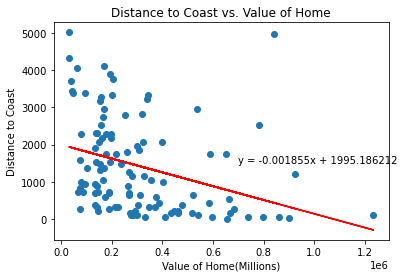

In [23]:
#Creating data analysis and scatter plot

DTC=merged_clean_DTC['DistancetoCoast']
VH=merged_clean_DTC['ValueofHome']
correlation = st.pearsonr(DTC,VH)
print(f'The correlation between Distance to Coast and value of home is {correlation[0]}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(VH,DTC)
line_eq = "y = " + str(round(slope,6)) + "x + " + str(round(intercept,6))
print(f'Linear regression equation is {line_eq}')

ValueofHome=merged_clean_DTC.ValueofHome
DistancetoCoast=merged_clean_DTC.DistancetoCoast
plt.scatter(ValueofHome, DistancetoCoast)
plt.title('Distance to Coast vs. Value of Home')
plt.ylabel('Distance to Coast')
plt.xlabel('Value of Home(Millions)')
reg_values = VH * slope + intercept
plt.plot(VH, reg_values, "r-")
plt.annotate(line_eq,(700000,1500))
plt.savefig("Distance to Coast Scatter")
plt.show()